# Final Project Introduce

This is a short introductoin about my final project for the course of Machine Learning.

As a project for the supervised learning problem, I selected the wine quality classification problem, using different methods learned from the course, and compared the result.

The purpose is to understand the concept of supervised learning, and learn how to resolve real world problems using a suitable method.

# 1. Data Source

The red wine data is from archive.ics.uci.edu. Here is the link of the source data.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

First step is loading the source data and cleaning the data.

This is a 11 measures with the classified label quality dataset. Total observation are 1599 records.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time
from sklearn.metrics import accuracy_score
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
get_ipython().run_line_magic('matplotlib', 'inline')
 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import urllib.request as urllib2
import urllib.parse as urlparse
from io import StringIO
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
bytes_data = response.read()
s=str(bytes_data,'utf-8')
data = StringIO(s) 
df=pd.read_csv(data, sep =';')
df.fillna(0)
print(df.columns)
print(df.shape)
# print(df.info)
print("fixed acidity data range:",df['fixed acidity'].min(),df['fixed acidity'].max())
print("volatile acidity data range:",df['volatile acidity'].min(),df['volatile acidity'].max())
print("citric acid data range:",df['citric acid'].min(),df['citric acid'].max())
print("residual sugar data range:",df['residual sugar'].min(),df['residual sugar'].max())
print("chlorides data range:",df['chlorides'].min(),df['chlorides'].max())
print("free sulfur dioxide data range:",df['free sulfur dioxide'].min(),df['free sulfur dioxide'].max())
print("total sulfur dioxide data range:",df['total sulfur dioxide'].min(),df['total sulfur dioxide'].max())
print("density data range:",df['density'].min(),df['density'].max())
print("pH data range:",df['pH'].min(),df['pH'].max())
print("sulphates data range:",df['sulphates'].min(),df['sulphates'].max())
print("alcohol data range:",df['alcohol'].min(),df['alcohol'].max())
print("quality data range:",df['quality'].min(),df['quality'].max())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)
fixed acidity data range: 4.6 15.9
volatile acidity data range: 0.12 1.58
citric acid data range: 0.0 1.0
residual sugar data range: 0.9 15.5
chlorides data range: 0.012 0.611
free sulfur dioxide data range: 1.0 72.0
total sulfur dioxide data range: 6.0 289.0
density data range: 0.9900700000000001 1.00369
pH data range: 2.74 4.01
sulphates data range: 0.33 2.0
alcohol data range: 8.4 14.9
quality data range: 3 8


# 2. Data analysis

Using matrix to show each measures corrlation.

The most related columns to quality are: alcohol, sulphates, citric acid and fixed acidity.

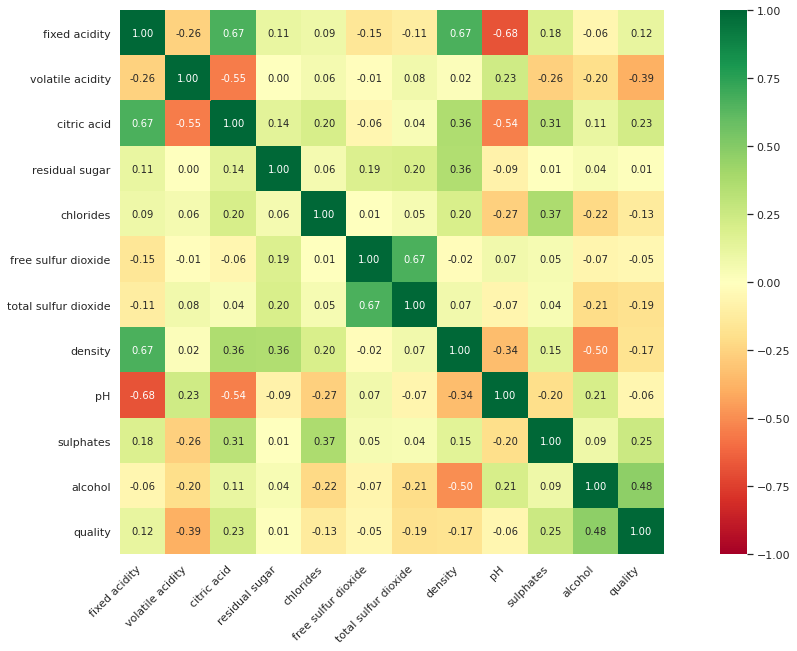

In [2]:
# Display the correlation matrix as heat map
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
 
ax = sns.heatmap(
    corr, 
    annot=True, fmt='.2f', cmap='RdYlGn',
    vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 3. Prepare training and testing data



In [4]:
# prepare data
X = df 
y = df['quality']
# del X['quality']
x_train,x_test, y_train,y_test = train_test_split(X, y,test_size=0.4, random_state=42)


# 4. Classification supervised learning
# 4.1 Normal logistic Regression

In [30]:
# using logisticRegression for prediction
from sklearn.linear_model import LogisticRegression
# get the start time
st = time.time()
LogReg = LogisticRegression(multi_class='ovr')
LogReg.fit(x_train, y_train) 
 
y_pred=LogReg.predict(x_test)
# get the end time
et = time.time()
print("logisticRegression ovr Accuracy:", accuracy_score(y_pred,y_test))
elapsed_time_logisticRegression = et - st
print("logisticRegression ovr runtime:",elapsed_time_logisticRegression)


logisticRegression ovr Accuracy: 0.8703125
logisticRegression ovr runtime: 189.98006987571716


# 4.2 Newton logistic Regression

In [31]:
st = time.time()
LogReg2 = LogisticRegression(multi_class='multinomial',solver='newton-cg')
LogReg2.fit(x_train, y_train) 
y_pred2=LogReg2.predict(x_test)
et = time.time()
print("LogisticRegression  newton-cg Accuracy:", accuracy_score(y_pred2,y_test))
elapsed_time_logisticRegression_newton = et - st
print("logisticRegression newton-cg runtime:",elapsed_time_logisticRegression_newton)

LogisticRegression  newton-cg Accuracy: 0.965625
logisticRegression newton-cg runtime: 0.8750131130218506


In [11]:
# 4.2 KNN with Multiple Labels

In [32]:
# KNN with Multiple Labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
st = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred3 = knn.predict(x_test)
et = time.time()
print("KNN Accuracy:", accuracy_score(y_test, y_pred3))
elapsed_time_KNN = et - st
print("KNN runtime:",elapsed_time_KNN)

KNN Accuracy: 0.5671875
KNN runtime: 0.020242929458618164


# 4.3 KNN with normalized data

In [33]:
# KNN with normalized data
st = time.time()
x_train_norm = preprocessing.StandardScaler().fit(x_train)
x_train_normd = x_train_norm.transform(x_train)
knn2 = KNeighborsClassifier(n_neighbors=5)
 
knn2.fit(x_train_normd,y_train)
x_test_norm = preprocessing.StandardScaler().fit(x_test)
x_test_normd = x_test_norm.transform(x_test)
y_pred4 = knn2.predict(x_test_normd)
et = time.time()
print("KNN with normalized Accuracy:", accuracy_score(y_test, y_pred4))
elapsed_time_KNN_normalized = et - st
print("KNN runtime:",elapsed_time_KNN_normalized)

KNN with normalized Accuracy: 0.8671875
KNN runtime: 0.03052234649658203


# 4.4 AdaBoost

In [34]:
# AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
st = time.time()
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred5 = model.predict(x_test)
et = time.time()
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred5))
elapsed_time_AdaBoost = et - st
print("AdaBoost runtime:",elapsed_time_AdaBoost)

AdaBoost Accuracy: 0.8375
AdaBoost runtime: 0.1591784954071045


# 4.5 GradientBoosting

In [35]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
st = time.time()
boost = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
model_boost= boost.fit(x_train, y_train)
y_pred6 = model_boost.predict(x_test)
et = time.time()
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred6))
elapsed_time_GradientBoosting = et - st
print("AdaBoost runtime:",elapsed_time_GradientBoosting)

GradientBoosting Accuracy: 1.0
AdaBoost runtime: 0.38300275802612305


# 4.6 Random Forest

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
st = time.time()
randomforest = RandomForestClassifier(max_depth=5, random_state=0)
randomforest.fit(x_train, y_train)
y_pred7 = randomforest.predict(x_test)
et = time.time()
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred7))
elapsed_time_randomforest = et - st
print("AdaBoost runtime:",elapsed_time_randomforest)

Random Forest Accuracy: 0.940625
AdaBoost runtime: 0.2799363136291504


# 4.7 SVM

In [45]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
st = time.time()
nlsvm = SVC(kernel="rbf", C=1, gamma=1)
nlsvm.fit(x_train, y_train)
scores = cross_val_score(nlsvm, X, y, cv=5) 
et = time.time()
svm_acc= np.mean(scores)
print("cross-val mean-accuracy:",svm_acc)
# nonlinear_plot(X, y, nlsvm)
elapsed_time_svm = et - st
print("Svm runtime:",elapsed_time_svm)

cross-val mean-accuracy: 0.5290752351097179
Svm runtime: 2.228048324584961


# 4.8 SVM with best gamma and C

In [23]:

def nonlinear_plot(X, y, clf=None): 
    
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    
    colors = [mycolors["red"] if yi==1 else mycolors["blue"] for yi in y]
    ax.scatter(X[:,0],X[:,1], marker='o', color=colors, s=100, alpha=0.5)
    
    ax.arrow(-1.25,0,2.5,0, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    ax.arrow(0,-1.25,0,2.5, head_length=0.05, head_width=0.05, fc="gray", ec="gray", lw=2, alpha=0.25)
    z = np.linspace(0.25,3.5,10)
    
    ax.set_xlim([-1.50,1.50])
    ax.set_ylim([-1.50,1.50])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([], fontsize=16)
    plt.yticks([], fontsize=16)
    

    if clf: 
        
        clf.fit(X,y)

        x_min = X[:, 0].min()+.00
        x_max = X[:, 0].max()-.00
        y_min = X[:, 1].min()+.00
        y_max = X[:, 1].max()-.00

        colors = [mycolors["red"] if yi==1 else mycolors["blue"] for yi in y]

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.contour(XX, YY, Z, colors=[mycolors["blue"], "gray", mycolors["red"]], linestyles=['--', '-', '--'],
                    levels=[-1.0, 0, 1.0], linewidths=[2,2,2], alpha=0.9)


In [20]:

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    def plotSearchGrid(grid):

        scores = [x for x in grid.cv_results_["mean_test_score"]]
        scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

        plt.figure(figsize=(10, 8))
        plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
        plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
                   norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
        plt.xlabel('gamma')
        plt.ylabel('C')
        plt.colorbar()
        plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
        plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
        plt.title('Validation accuracy')
        plt.show()

In [25]:
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

{'gamma': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01]), 'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01])}


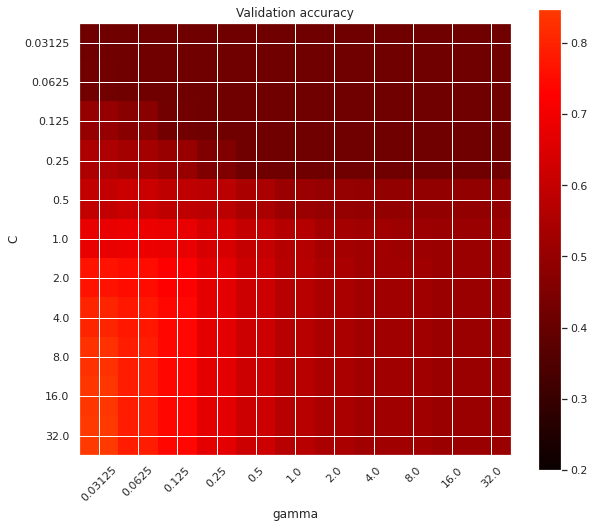

In [26]:

from sklearn.model_selection import cross_val_score, GridSearchCV
c_range = np.logspace(-5, 5, 11, base=2)
g_range = np.logspace(-5, 5, 11, base=2)
 
param_grid = dict(gamma=g_range, C=c_range)
print(param_grid)
grid = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)
plotSearchGrid(grid)


From the above graphic, we can easily figure out the best gamma is 0.03125, C is 32.0

In [44]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
c = 32
gamma =0.03125
st = time.time()
nlsvm = SVC(kernel="rbf", C=c, gamma=gamma)
nlsvm.fit(x_train, y_train)
scores = cross_val_score(nlsvm, X, y, cv=5) 
et = time.time()
print("cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
# nonlinear_plot(X, y, nlsvm)
elapsed_time_best_SVM = et - st
print("Best SVM runtime:",elapsed_time_best_SVM)

cross-val mean-accuracy: 0.887
Best SVM runtime: 1.6592061519622803


# 5. Conclusion

In [51]:
print("GradientBoosting Accuracy & runtime(seconds):", accuracy_score(y_test, y_pred6),elapsed_time_GradientBoosting)
print("LogisticRegression  newton-cg Accuracy & runtime(seconds):", accuracy_score(y_pred2,y_test),elapsed_time_logisticRegression_newton )
print("Random Forest Accuracy & runtime(seconds):", accuracy_score(y_test, y_pred7),elapsed_time_randomforest)
print("SVM cross-val mean-accuracy & runtime(seconds):",svm_acc,elapsed_time_svm)
print("SVM cross-val mean-accuracy & runtime(seconds) with best params:",np.mean(scores),elapsed_time_best_SVM)
print("logisticRegression ovr Accuracy & runtime(seconds):", accuracy_score(y_pred,y_test),elapsed_time_logisticRegression)
print("KNN with normalized Accuracy & runtime(seconds):", accuracy_score(y_test, y_pred4),elapsed_time_KNN_normalized)
print("AdaBoost Accuracy & runtime(seconds):", accuracy_score(y_test, y_pred5),elapsed_time_AdaBoost)
print("KNN Accuracy & runtime(seconds):", accuracy_score(y_test, y_pred3),elapsed_time_KNN)

GradientBoosting Accuracy & runtime(seconds): 1.0 0.38300275802612305
LogisticRegression  newton-cg Accuracy & runtime(seconds): 0.965625 0.8750131130218506
Random Forest Accuracy & runtime(seconds): 0.940625 0.2799363136291504
SVM cross-val mean-accuracy & runtime(seconds): 0.5290752351097179 2.228048324584961
SVM cross-val mean-accuracy & runtime(seconds) with best params: 0.5290752351097179 1.6592061519622803
logisticRegression ovr Accuracy & runtime(seconds): 0.8703125 189.98006987571716
KNN with normalized Accuracy & runtime(seconds): 0.8671875 0.03052234649658203
AdaBoost Accuracy & runtime(seconds): 0.8375 0.1591784954071045
KNN Accuracy & runtime(seconds): 0.5671875 0.020242929458618164


# For accuracy:
You can find that the best method for this case is Gradient Boosting, it reached 100% match. 
As we know generally the GradientBoosting and Random Forest are the most selected method for classification supervised learning, in this special case which only have 11 measures, that can explain why GradientBoosting is better than Random Forest, Random Forest should be better on the measures more than 50's cases.

# For Performance:

The worst performance is from the Logistic Regression. It takes 189 seconds. Compared to other methods, most of them are less than 1 second. But Newton Logistic Regression is pretty much better. It ranks as 2 for accuracy. The performance is also acceptable, less than 1 second.

From here we can find the significant differences between each method, so choosing the right method for your case is very important for creating a successful model.

